In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import pickle

In [2]:
# Leer tabla
datos = pd.read_excel("C:/Users/Lenovo/Desktop/Talento Tech/Proyecto/base_agrícola_2019 _2023.xlsx")
datos.head()

,Código Dane departamento,Departamento,Código Dane municipio,Municipio,Desagregación cultivo,Cultivo,Ciclo del cultivo,Grupo cultivo,Subgrupo,Año,Periodo,Área sembrada (ha),Área cosechada (ha),Producción (t),Rendimiento (t/ha),Nombre científico del cultivo,Código del cultivo,Estado físico del cultivo
0,5,Antioquia,5001,Medellín,Aguacate demás variedades,Aguacate,Permanente,Frutales,Demás frutales,2019,2019,24.00,23.00,138.00,6.0,Persea americana,2040299,En fresco
1,5,Antioquia,5001,Medellín,Aguacate demás variedades,Aguacate,Permanente,Frutales,Demás frutales,,2020,8.52,3.52,21.12,6.0,Persea americana,2040299,En fresco
2,5,Antioquia,5001,Medellín,Aguacate demás variedades,Aguacate,Permanente,Frutales,Demás frutales,2021,2021,8.52,4.52,27.12,6.0,Persea americana,2040299,En fresco
3,5,Antioquia,5001,Medellín,Aguacate demás variedades,Aguacate,Permanente,Frutales,Demás frutales,2022,2022,17.17,8.52,51.12,6.0,Persea americana,2040299,En fresco
4,5,Antioquia,5001,Medellín,Aguacate demás variedades,Aguacate,Permanente,Frutales,Demás frutales,2023,2023,14.97,8.52,51.12,6.0,Persea americana,2040299,En fresco


In [5]:
# Verificar si hay cadenas vacías ("") o solo espacios en blanco
vacios = datos.applymap(lambda x: isinstance(x, str) and x.strip() == "")
vacios.sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9792\3624624451.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vacios = datos.applymap(lambda x: isinstance(x, str) and x.strip() == "")


Código Dane departamento         0
Departamento                     0
Código Dane municipio            0
Municipio                        0
Desagregación cultivo            0
Cultivo                          0
Ciclo del cultivo                0
Grupo cultivo                    0
Subgrupo                         0
Año                              1
Periodo                          0
Área sembrada (ha)               0
Área cosechada (ha)              0
Producción (t)                   0
Rendimiento (t/ha)               0
Nombre científico del cultivo    0
Código del cultivo               0
Estado físico del cultivo        0
dtype: int64

In [7]:
# Llenar datos vacio
datos = datos.applymap(lambda x: 2020 if isinstance(x, str) and x.strip() == "" else x)
datos.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9792\371449246.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  datos = datos.applymap(lambda x: 2020 if isinstance(x, str) and x.strip() == "" else x)


,Código Dane departamento,Departamento,Código Dane municipio,Municipio,Desagregación cultivo,Cultivo,Ciclo del cultivo,Grupo cultivo,Subgrupo,Año,Periodo,Área sembrada (ha),Área cosechada (ha),Producción (t),Rendimiento (t/ha),Nombre científico del cultivo,Código del cultivo,Estado físico del cultivo
0,5,Antioquia,5001,Medellín,Aguacate demás variedades,Aguacate,Permanente,Frutales,Demás frutales,2019,2019,24.00,23.00,138.00,6.0,Persea americana,2040299,En fresco
1,5,Antioquia,5001,Medellín,Aguacate demás variedades,Aguacate,Permanente,Frutales,Demás frutales,2020,2020,8.52,3.52,21.12,6.0,Persea americana,2040299,En fresco
2,5,Antioquia,5001,Medellín,Aguacate demás variedades,Aguacate,Permanente,Frutales,Demás frutales,2021,2021,8.52,4.52,27.12,6.0,Persea americana,2040299,En fresco
3,5,Antioquia,5001,Medellín,Aguacate demás variedades,Aguacate,Permanente,Frutales,Demás frutales,2022,2022,17.17,8.52,51.12,6.0,Persea americana,2040299,En fresco
4,5,Antioquia,5001,Medellín,Aguacate demás variedades,Aguacate,Permanente,Frutales,Demás frutales,2023,2023,14.97,8.52,51.12,6.0,Persea americana,2040299,En fresco


In [8]:
# Filtrar columnas relevantes segundo modelo 
datos_relevantes_2 = datos[['Cultivo','Área sembrada (ha)','Departamento', 'Rendimiento (t/ha)' ]]
datos_relevantes_2.head()

,Cultivo,Área sembrada (ha),Departamento,Rendimiento (t/ha)
0,Aguacate,24.00,Antioquia,6.0
1,Aguacate,8.52,Antioquia,6.0
2,Aguacate,8.52,Antioquia,6.0
3,Aguacate,17.17,Antioquia,6.0
4,Aguacate,14.97,Antioquia,6.0


In [11]:
# Cultivos con mayor área sembrada
cultivos = datos.groupby("Cultivo")[['Área sembrada (ha)', 'Área cosechada (ha)']].sum()
cultivos = cultivos.sort_values(by='Área sembrada (ha)', ascending=False)
cultivos.head(30)

,Área sembrada (ha),Área cosechada (ha)
Cultivo,,
Café,4.238261e+06,3.508992e+06
Arroz,3.399586e+06,3.281958e+06
Palma de aceite,3.296078e+06,3.096725e+06
Maíz,2.762608e+06,2.628550e+06
Caña,2.606260e+06,2.414363e+06
Plátano,2.347926e+06,2.184552e+06
Cacao,1.212572e+06,1.098148e+06
Yuca,1.100313e+06,1.009747e+06
Papa,9.587512e+05,9.094950e+05


In [13]:
# Nueva tabla con cultivos seleccionados segundo modelo 
cultivos_selec_2 = datos_relevantes_2[datos_relevantes_2['Cultivo'].isin(['Café','Arroz','Palma de aceite','Maíz', 'Caña', 'Plátano', 'Cacao','Yuca','Papa','Aguacate','Frijol','Banano','Soya','Naranja','Mango','Limón','Ñame','Arveja','Piña','Coco','Tomate','Mandarina','Mora','Ahuyama','Fique','Cebolla de bulbo','Patilla','Chontaduro','Cebolla de rama'])]
cultivos_selec_2.head()

,Cultivo,Área sembrada (ha),Departamento,Rendimiento (t/ha)
0,Aguacate,24.00,Antioquia,6.0
1,Aguacate,8.52,Antioquia,6.0
2,Aguacate,8.52,Antioquia,6.0
3,Aguacate,17.17,Antioquia,6.0
4,Aguacate,14.97,Antioquia,6.0


In [15]:
# Aplicar One-Hot Encoding segundo modelo
datos_finales_selec_2= pd.get_dummies(cultivos_selec_2, columns=['Cultivo','Departamento'],dtype=int)
datos_finales_selec_2.head()

,Área sembrada (ha),Rendimiento (t/ha),Cultivo_Aguacate,Cultivo_Ahuyama,Cultivo_Arroz,Cultivo_Arveja,Cultivo_Banano,Cultivo_Cacao,Cultivo_Café,Cultivo_Caña,...,Departamento_Norte de Santander,Departamento_Putumayo,Departamento_Quindío,Departamento_Risaralda,Departamento_Santander,Departamento_Sucre,Departamento_Tolima,Departamento_Valle del Cauca,Departamento_Vaupés,Departamento_Vichada
0,24.00,6.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.52,6.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.52,6.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17.17,6.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14.97,6.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Relación entre area sembrada y rendimiento
# Preprocesamiento de datos para el modelo
X_2 = datos_finales_selec_2.drop('Rendimiento (t/ha)', axis=1) 
y_2 = datos_finales_selec_2['Rendimiento (t/ha)']

# Dividir registros en segmentos de entrenamiento y prueba
X_2_entrenamiento, X_2_prueba, y_2_entrenamiento, y_2_prueba = train_test_split(X_2, y_2, test_size=0.2, random_state=69)

# Entrenar el modelo
modelo_2 = RandomForestRegressor()  # Crear una instancia del modelo
modelo_2.fit(X_2_entrenamiento, y_2_entrenamiento)

# Realizar predicciones
y_2_predicciones = modelo_2.predict(X_2_prueba)
print(y_2_predicciones)

# Calcular el r2
r2_2 = r2_score(y_2_prueba, y_2_predicciones)
print("R2:", r2_2)

# Realizar validación cruzada
scores_2 = cross_val_score(modelo_2, X_2, y_2, cv=5)  # cv=5 para 5 pliegues
print("Puntajes de validación cruzada:", scores_2)
print("Media de R^2 de validación cruzada:", np.mean(scores_2)) 


[ 4.70883333 13.38       15.61175568 ... 10.96433333 14.74183117
  9.20138391]
R2: 0.6972867931738908
Puntajes de validación cruzada: [0.46270697 0.53633219 0.41389402 0.51941703 0.59186857]
Media de R^2 de validación cruzada: 0.5048437555726302


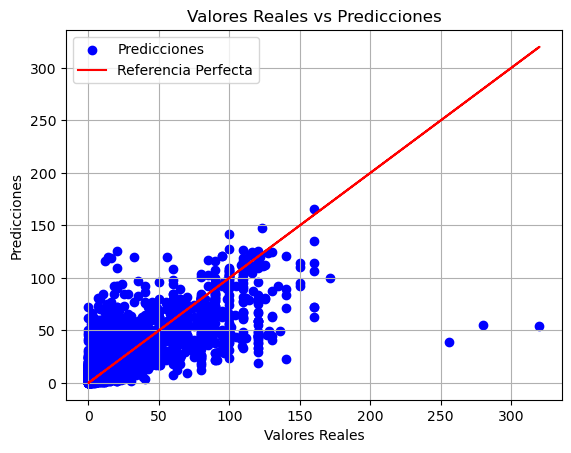

In [19]:
# Gráfico de dispersión de los valores reales vs las predicciones
plt.scatter(y_2_prueba, y_2_predicciones, color='blue', label='Predicciones')
plt.plot(y_2_prueba, y_2_prueba, color='red', label='Referencia Perfecta')  # Línea de referencia perfecta
plt.xlabel('Valores Reales')  # Asegúrate de usar mayúscula si así lo prefieres
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')  # Agregar un título al gráfico
plt.legend()
plt.grid(True)  
plt.show()

In [33]:
with open('modelo_2.pkl', 'wb') as f:
    pickle.dump(modelo_2, f)